## Описание проекта

Требуется проанализировать данные клиентов оператора сотовой связи. На выбор клиентам предлагалось два тарифных плана: «Смарт» и «Ультра». 
Для планированирования рекламного бюджета коммерческому депараменту необходимо выяснить, какой тариф приносит больше денег.
Анализ тарифов предстоит выполнить на выборке клиентов из 500 пользователей.
Известно: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений совершил каждый за рассматриваемый период. На основе анализа поведения сделать вывод — какой тариф лучше.

### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

## Описание данных для работы

Таблица calls (информация о звонках):
-	id — уникальный номер звонка
-	call_date — дата звонка
-	duration — длительность звонка в минутах
-	user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
-	id — уникальный номер сообщения
-	message_date — дата сообщения
-	user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
-	id — уникальный номер сессии
-	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
-	session_date — дата интернет-сессии
-	user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
-	tariff_name — название тарифа
-	rub_monthly_fee — ежемесячная абонентская плата в рублях
-	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
-	messages_included — количество сообщений в месяц, включённых в абонентскую плату
-	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
-	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
-	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
-	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица users (информация о пользователях):
-	user_id — уникальный идентификатор пользователя
-	first_name — имя пользователя
-	last_name — фамилия пользователя
-	age — возраст пользователя (годы)
-	reg_date — дата подключения тарифа (день, месяц, год)
-	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
-	city — город проживания пользователя
-	tariff — название тарифного плана

## План работ:

1. Знакомство с данными и изучение общей информации


2. Подготовка (предобработка) данных
    - Преобразование типов данных
    - Поиск и исправление ошибок в данных
    - Расчет по пользователям количества звонков и израсходованных минут по месяцам
    - Расчет для каждого пользователя количества отправленных сообщений по месяцам
    - Расчет для каждого пользователя объема израсходованного интернет-трафика по месяцам
    - Расчет помесячной выручки с каждого пользователя


3. Анализ данных
    - Описание поведения клиентов
    - Cреднее количество, дисперсия и стандартное отклонение параметров по каждому тарифу
    - Гистограммы плотностей анализируемых параметров по тарифам


4. Проверка гипотез

## 1. Знакомство с данными и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# загрузим таблицу 'calls' с информацией о звонках
calls = pd.read_csv('/datasets/calls.csv')

# выведем первых 10 строк таблицы 
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [2]:
# посмотрим общую информацию о данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице 'calls' названия колонок корректны, всего 202607 записей, пропущенных значений нет, данные колонки 'call_date' представлены типом 'object', который требуется заменить на 'datetime' и извлечь информацию о месяце.

Значения длительности звонков в колонке 'duration' типа float64, но по условию «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Поэтому значения колонки 'duration' требуется округлить вверх.
Посмотрим значения длительности звонков 'duration' методом .describe()

In [3]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В колонке 'duration' значения длительности звонков выглядят логично, есть минимальные значения, равные 0. Посмотрим, сколько их.

In [4]:
calls.loc[calls['duration'] == 0].count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

Количество звонков, длительностью 0 минут составляют 39613, приблизительно 20% от общего числа. Предположительно это звонки, оставленные без ответа абонента. Они не учитываются при расчете стоимости тарифа за месяц, поэтому их можно удалить.

Загрузим таблицу 'internet' с информацией о потраченном пользователями трафике:

In [5]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0) #параметр index_col=0 делает данный столбец 'Unnamed: 0' индексом
# выведем первые строки таблицы:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
# выведем информацию о данных
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В таблице 'internet' названия колонок корректны, всего 149396 записей, пропущенных значений нет, колонка 'unnamed' дублирует индексы, ее можно удалить. Данные колонки 'session_date' представлены типом 'object', который следует заменить на 'datetime' и извлечь информацию о месяце.

Данные колонки 'mb_used' представлены типом float64, но по правилам "Мегалайна" значения для расчетов потребуется округлить вверх.

In [7]:
# загрузим данные о количестве сообщений пользователей в таблицу 'messages'
messages = pd.read_csv('/datasets/messages.csv')

# выведем первые строки таблицы и информацию о данных
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Данные содержат 123036 записей об отправленных сообщениях, 'message_date' - колонка с информацией о дате сообщения, типа object, требуется перевести в тип 'datetime'.

Загрузим данные о пользователях в таблицу 'users' и выведем для ознакомления последние 5 строк таблицы.

In [9]:
users = pd.read_csv('/datasets/users.csv')
users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [10]:
# выведем информацию о данных:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица содержит колонки с информацией о пользователе. Из этой таблицы потребуются данные с id пользователя -'user_id', 'tariff' и 'city'. Данные колонок 'churn_date', 'reg_date' для текущего анализа не потребуются, поэтому тип данных, пропущенные значения можно оставить как есть.

Колонка 'user_id' - общая для четырех рассмотренных таблиц позволит объединить данные всех таблиц при необходимости.

In [11]:
# загрузим данные о тарифах "Смарт" и "Ультра" в таблицу 'tariffs'
tariffs = pd.read_csv('/datasets/tariffs.csv')

# выведем таблицу на экран
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица 'tariffs' состоит всего из двух строк записей. Названия колонок, типы данных корректны.

### Вывод

На этапе предобработки и подготовки данных к анализу потребуется:

1. В таблицах 'calls', 'internet', 'messages' преобразовать тип данных в колонках с датой к типу 'datetime' и добавить колонку с месяцем.
2. Округлить занчения вверх с длительностью звонков и объемом мегабайт.
3. Рассчитать по месяцам для всех пользователей объемы минут, объемы трафика, количество сообщений.
4. Объединить данные таблиц 'calls', 'internet', 'messages' в одну таблицу по 'user_id' и месяцу, добавить из таблицы 'users' данные по тарифу и городу пользователя.
5. Рассчитать выручку с каждого пользователя по месяцу.

## 2. Подготовка (предобработка) данных

### Преобразование типов данных

Для преобразования данных с информацией о дате в тип datetime и добавлении столбца 'month' в таблицах 'calls', 'internet', 'messages' напишем функцию 'change_type':

In [13]:
def change_type (data, date):
    data[date] = pd.to_datetime(data[date], format = '%Y-%m-%d')
    data['month'] = data[date].dt.month
    return

In [14]:
# применим функцию к таблице 'calls'
change_type(calls, 'call_date')

In [15]:
# посмотрим результат добавления колонки с месяцем
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [16]:
# применим фунцию к таблице 'internet'
change_type(internet, 'session_date')
# проверим результат
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [17]:
# применим фунцию к таблице 'messages'
change_type(messages, 'message_date')
# проверим результат
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


### Поиск и исправление ошибок в данных

В таблице 'calls' оставим только те строки, длительность звонков 'duration' в которых не равна 0.

In [18]:
# для удаления строк воспользуемся методом .query()
calls = calls.query("duration != 0")
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9


Так как в "Мегалайне" длительность звонков считается целыми минутами округлим вверх значения колонки 'duration' с помощью применения функции np.ceil() к этой колонке:

In [19]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


**Удаление данных с нулевым трафиком в таблице 'Internet'**

Исходные данные по трафику предствлены в мегабайтах с точностью до десятых единиц. Проверим, есть ли сессии с нулевым трафиком:

In [20]:
internet.query('mb_used == 0').head()

,id,mb_used,session_date,user_id,month
11,1000_11,0.0,2018-08-28,1000,8
38,1000_38,0.0,2018-11-27,1000,11
46,1000_46,0.0,2018-06-30,1000,6
67,1000_67,0.0,2018-06-16,1000,6
72,1000_72,0.0,2018-06-15,1000,6


Предположительно нулевой трафик возник при использовании пользователем фоновых приложений, где трафик составил небольшой объем в килобайтах и при выгрузке с указанной точностью округлился до 0. Так как нам не требуется в анализе количество соединений с интернетом, то можно эти данные удалить, хотя и на подсчет суммы трафика в месяц они тоже не повлияют.

Удалим эти нулевые значения:

In [21]:
# для удаления строк воспользуемся методом .query()
internet = internet.query("mb_used != 0")

Повторим подобные действия для округления вверх трафика в мегабайтах таблицы 'internet'/

In [22]:
# выведем 5 строк до обработки
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [23]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
# проверим результат округления
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9


### Расчет по пользователям количества звонков и израсходованных минут по месяцам

Количество звонков и объем минут по месяцам каждого пользователя выполним с помощью метода .groupby() по колонкам 'user_id','month' и агрегирующих функций 'count', 'sum' по значениям колонки 'duration'. Результат сохраним в таблице 'calls_user'

In [24]:
calls_user = calls.groupby(['user_id','month']).agg(['count', 'sum'])['duration']
calls_user.head(10)

count    sum
user_id month              
1000    5         17  159.0
        6         28  172.0
        7         41  340.0
        8         42  408.0
        9         46  466.0
        10        44  350.0
        11        37  338.0
        12        38  333.0
1001    11        45  430.0
        12        47  414.0

In [25]:
# переименуем колонки полученной таблицы:
calls_user.columns = ['calls_count', 'calls_duration']
calls_user.head(10)

calls_count  calls_duration
user_id month                             
1000    5               17           159.0
        6               28           172.0
        7               41           340.0
        8               42           408.0
        9               46           466.0
        10              44           350.0
        11              37           338.0
        12              38           333.0
1001    11              45           430.0
        12              47           414.0

### Расчет для каждого пользователя количества отправленных сообщений по месяцам

В таблицу messages_user с помощью методов .groupby и .agg('count') рассчитаем количество соообщений по пользователю

In [26]:
messages_user = messages.groupby(['user_id','month']).agg('count')[['id']]
messages_user

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [27]:
# переименуем колонку id 'messages_count'
messages_user.columns = ['messages_count']
messages_user.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

### Расчет для каждого пользователя объема израсходованного интернет-трафика по месяцам

In [28]:
# Расчет для каждого пользователя объема израсходованного интернет-трафика по месяцам
internet_user = internet.groupby(['user_id', 'month']).agg('sum')[['mb_used']]
internet_user

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3201 rows x 1 columns]

### Расчет помесячной выручки с каждого пользователя 

Для расчета помесячной выручки с каждого пользователя объединим таблицы internet_user, calls_user, messages_user в одну expenses_user. Так как во всех трех таблицах одинаковые индексы, объединение выполним с помощью .join и чтобы не потерять ни одного значения используем внешнее соединение 'outer':

In [29]:
expenses_user = (
    internet_user
    .join(calls_user, how='outer')
    .join(messages_user, how='outer')
)

In [30]:
# проверим результат объединеия:
expenses_user

mb_used  calls_count  calls_duration  messages_count
user_id month                                                      
1000    5       2256.0         17.0           159.0            22.0
        6      23257.0         28.0           172.0            60.0
        7      14016.0         41.0           340.0            75.0
        8      14070.0         42.0           408.0            81.0
        9      14581.0         46.0           466.0            57.0
...                ...          ...             ...             ...
1498    10     20604.0         30.0           247.0            42.0
1499    9       1848.0          8.0            70.0            11.0
        10     17809.0         44.0           449.0            48.0
        11     17984.0         62.0           612.0            59.0
        12     13077.0         56.0           492.0            66.0

[3214 rows x 4 columns]

Выполним переиндексацию таблицы expenses_user

In [31]:
expenses_user.reset_index(inplace = True)
expenses_user.head()

,user_id,month,mb_used,calls_count,calls_duration,messages_count
0,1000,5,2256.0,17.0,159.0,22.0
1,1000,6,23257.0,28.0,172.0,60.0
2,1000,7,14016.0,41.0,340.0,75.0
3,1000,8,14070.0,42.0,408.0,81.0
4,1000,9,14581.0,46.0,466.0,57.0


Получили таблицу с затратами каждого пользователя по месяцам. Для дальнейших расчетов в этой таблице не хватает данных по тарифу пользователя и информации из какого он города. Эти данные можно получить из таблицы users.

In [32]:
# выведем названия колонок таблицы users
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

Создадим таблицу users_tariff из таблицы users, удалив все колонки кроме 'user_id', 'city' и 'tariff'.

In [33]:
users_tariff = users.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)
users_tariff

,user_id,age,city,tariff
0,1000,52,Краснодар,ultra
1,1001,41,Москва,smart
2,1002,59,Стерлитамак,smart
3,1003,23,Москва,ultra
4,1004,68,Новокузнецк,ultra
...,...,...,...,...
495,1495,65,Иркутск,ultra
496,1496,36,Вологда,smart
497,1497,32,Челябинск,smart
498,1498,68,Владикавказ,smart


Присоединим к таблице expenses_user таблицу users_tariff по колонке 'user_id'

In [34]:
expenses_user_tariff = expenses_user.merge(users_tariff, on='user_id', how = 'left')
# посмотрим результат
expenses_user_tariff.head()

,user_id,month,mb_used,calls_count,calls_duration,messages_count,age,city,tariff
0,1000,5,2256.0,17.0,159.0,22.0,52,Краснодар,ultra
1,1000,6,23257.0,28.0,172.0,60.0,52,Краснодар,ultra
2,1000,7,14016.0,41.0,340.0,75.0,52,Краснодар,ultra
3,1000,8,14070.0,42.0,408.0,81.0,52,Краснодар,ultra
4,1000,9,14581.0,46.0,466.0,57.0,52,Краснодар,ultra


Посмотрим информацию о данных полученной результирующей таблицы

In [35]:
expenses_user_tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id           3214 non-null int64
month             3214 non-null int64
mb_used           3201 non-null float64
calls_count       3168 non-null float64
calls_duration    3168 non-null float64
messages_count    2717 non-null float64
age               3214 non-null int64
city              3214 non-null object
tariff            3214 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 251.1+ KB


Колонки 'mb_used', 'calls_count', 'calls_duration', 'messages_count' содержат пропущенные значения. По логике они равны 0, так как у каких-то пользователей в данный месяц мог отсутствовать трафик, либо звонки, либо сообщения. Заменим эти значения на нулевые:

In [36]:
expenses_user_tariff.fillna(0, inplace = True)

Проверим результат замены:

In [37]:
expenses_user_tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id           3214 non-null int64
month             3214 non-null int64
mb_used           3214 non-null float64
calls_count       3214 non-null float64
calls_duration    3214 non-null float64
messages_count    3214 non-null float64
age               3214 non-null int64
city              3214 non-null object
tariff            3214 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 251.1+ KB


Данные с информацией о количестве звонков 'calls_count' и количестве сообщений 'messages_count' по смыслу целого типа. Выполним преобразование к целому типу:

In [38]:
expenses_user_tariff[['calls_count', 'messages_count']] = expenses_user_tariff[['calls_count', 'messages_count']].astype('int')
expenses_user_tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id           3214 non-null int64
month             3214 non-null int64
mb_used           3214 non-null float64
calls_count       3214 non-null int64
calls_duration    3214 non-null float64
messages_count    3214 non-null int64
age               3214 non-null int64
city              3214 non-null object
tariff            3214 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 251.1+ KB


Расчет помесячной выручки по пользователю будем выполнять с помощью применения функции расчета затрат в месяц по каждому пользователю. Перед созданием функции в таблице **tariffs** преобразуем колонку с именем тарифа в индекс.

In [39]:
tariffs.set_index('tariff_name', inplace=True)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


Так проще будет обращаться к значениям колонок выбранного тарифа:

In [40]:
tariffs.loc['smart', 'minutes_included']

500

Создадим функцию **'user_payment_month'**, которая будет рассчитывать ежемесячные платежи пользователей согласно их тарифу и с учетом потраченных минут на звонки 'calls_duration', количества сообщений 'messages_count', траффика в мегабайтах 'mb_used'

In [41]:
def user_payment_month(row):

    # определяем текущий тариф и значения  минут, сообщений, мегабайт по пользователю в месяц
    tariff = row['tariff']
    messages_month = row['messages_count']
    minutes_month = row['calls_duration']
    mb_month = row['mb_used']
    
    # фиксируем лимиты по определившемуся тарифу:
    minutes_lim = tariffs.loc[tariff, 'minutes_included']
    messages_lim = tariffs.loc[tariff, 'messages_included']
    mb_lim = tariffs.loc[tariff, 'mb_per_month_included']
    
    
    
    # определяем платежи сверх тарифа:
    minutes_overlim = max(minutes_month - minutes_lim, 0)
    minutes_overpay = minutes_overlim * tariffs.loc[tariff, 'rub_per_minute']
    
    messages_overlim = max(messages_month - messages_lim, 0)
    messages_overpay = messages_overlim * tariffs.loc[tariff, 'rub_per_message']
    
    mb_overlim = max(mb_month - mb_lim, 0)
    mb_overpay = mb_overlim / 1024 * tariffs.loc[tariff, 'rub_per_gb']
    
    # рассчитываем итоговую сумму платежа пользователя по тарифу в месяц
    payment = (tariffs.loc[tariff, 'rub_monthly_fee'] + minutes_overpay + messages_overpay + mb_overpay).round(0)
    
    return payment   

Результат функции присвоим соответствующему значению новой колонки 'payment' таблицы 'expenses_user_tariff'

In [42]:
expenses_user_tariff['payment'] = expenses_user_tariff.apply(user_payment_month, axis=1)

Посмотрим результаты расчетов:

In [43]:
expenses_user_tariff

,user_id,month,mb_used,calls_count,calls_duration,messages_count,age,city,tariff,payment
0,1000,5,2256.0,17,159.0,22,52,Краснодар,ultra,1950.0
1,1000,6,23257.0,28,172.0,60,52,Краснодар,ultra,1950.0
2,1000,7,14016.0,41,340.0,75,52,Краснодар,ultra,1950.0
3,1000,8,14070.0,42,408.0,81,52,Краснодар,ultra,1950.0
4,1000,9,14581.0,46,466.0,57,52,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,20604.0,30,247.0,42,68,Владикавказ,smart,1574.0
3210,1499,9,1848.0,8,70.0,11,35,Пермь,smart,550.0
3211,1499,10,17809.0,44,449.0,48,35,Пермь,smart,1028.0
3212,1499,11,17984.0,62,612.0,59,35,Пермь,smart,1426.0


### Вывод

Создана таблица 'expenses_user_tariff', в которой расчитаны и собраны все данные, необходимые для анализа:
- mb_used - трафик пользователя по месяцам;
- calls_duration - суммарная продолжительность звонков в месяц;
- messages_count - количество сообщений пользователя в месяц;
- payment - платеж пользователя в месяц по тарифу

## 3. Анализ данных

### Описание поведения клиентов

Для первичного анализа данных посмотрим статистические характеристики с помощью метода .describe() для расчитанных данных по пользователю в месяц каждого тарифа.

In [44]:
expenses_user_tariff.query("tariff == 'smart'")[['mb_used', 'calls_duration', 'messages_count', 'payment']].describe()

,mb_used,calls_duration,messages_count,payment
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,16229.188425,417.934948,33.384029,1233.355316
std,5877.576978,190.313730,28.227876,787.691785
min,0.000000,0.000000,0.000000,550.000000
25%,12658.000000,282.000000,10.000000,550.000000
50%,16531.000000,422.000000,28.000000,960.000000
75%,20068.000000,545.000000,51.000000,1668.000000
max,38610.000000,1435.000000,143.000000,6711.000000


In [45]:
expenses_user_tariff.query("tariff == 'ultra'")[['mb_used', 'calls_duration', 'messages_count', 'payment']].describe()

,mb_used,calls_duration,messages_count,payment
count,985.000000,985.000000,985.000000,985.000000
mean,19486.901523,526.623350,49.363452,2060.529949
std,10096.317202,317.606098,47.804457,356.291467
min,0.000000,0.000000,0.000000,1950.000000
25%,11785.000000,284.000000,6.000000,1950.000000
50%,19324.000000,518.000000,38.000000,1950.000000
75%,26863.000000,752.000000,79.000000,1950.000000
max,49789.000000,1673.000000,224.000000,4743.000000


1. Как видим количество пользователей по месяцам, выбравших тариф "Смарт" более чем в два раза (по сумме месяцев) превышает пользователей "Ультра".


2. Пользователи "Ультра" в среднем используют интернет-трафик на 20% больше. При этом во включенный объем укладываются менее 50% пользователей в месяц тарифа "Смарт", а по тарифу "Ультра" более 75%. Средние и медианные значения в обоих тарифах близки друг друг, а вот стандартные отклонения значительные, что говорит о наличии выбросов в выборке.


3. Количество потраченных минут разговора по месяцам в среднем у пользователей тарифа "Ультра" на 25% больше. При этом во включенный объем по звонкам в месяц пользователи укладываются более чем в 50% месяцев, а пользователи тарифа "Ультра" всегда укладываются по минутам во включенный объем и никогда его не выбирают.


4. Количество отправленных сообщений по месяцам в среднем у пользователей тарифа "Ультра" приблизительно на 40% больше, чем у пользователей "Смарт". При этом, пользователям "Ультра" никогда не требуется количество сообщений, которое включено в тариф, они максимум используют только 20% этого объема. Пользователям тарифа "Смарт" точно хватает включеннго объема только в 50% месяцев.


5. В каждом тарифе есть пользователи, которые не пользуются частью услуг, влюченных в тариф - либо трафиком, либо минутами разговора, либо сообщениями. 

Выведем для просмотра некоторые из них:

In [46]:
expenses_user_tariff.query("tariff == 'smart' and calls_duration == 0").head()

,user_id,month,mb_used,calls_count,calls_duration,messages_count,age,city,tariff,payment
2346,1373,1,9184.0,0,0.0,28,34,Улан-Удэ,smart,550.0
2349,1373,4,20399.0,0,0.0,48,34,Улан-Удэ,smart,1534.0
2351,1373,6,12457.0,0,0.0,48,34,Улан-Удэ,smart,550.0
3149,1489,8,11066.0,0,0.0,17,35,Санкт-Петербург,smart,550.0
3150,1489,9,17232.0,0,0.0,32,35,Санкт-Петербург,smart,916.0


In [47]:
expenses_user_tariff.query("tariff == 'smart' and mb_used == 0").head()

,user_id,month,mb_used,calls_count,calls_duration,messages_count,age,city,tariff,payment
2306,1365,10,0.0,5,43.0,1,38,Ростов-на-Дону,smart,550.0
2858,1446,8,0.0,4,50.0,1,64,Липецк,smart,550.0


In [48]:
expenses_user_tariff.query("tariff == 'ultra' and calls_duration == 0").head()

,user_id,month,mb_used,calls_count,calls_duration,messages_count,age,city,tariff,payment
570,1091,5,10714.0,0,0.0,30,36,Набережные Челны,ultra,1950.0
571,1091,6,10245.0,0,0.0,30,36,Набережные Челны,ultra,1950.0
572,1091,7,16460.0,0,0.0,35,36,Набережные Челны,ultra,1950.0
573,1091,8,12644.0,0,0.0,31,36,Набережные Челны,ultra,1950.0
574,1091,9,16611.0,0,0.0,32,36,Набережные Челны,ultra,1950.0


In [49]:
expenses_user_tariff.query("tariff == 'ultra' and mb_used == 0").head()

,user_id,month,mb_used,calls_count,calls_duration,messages_count,age,city,tariff,payment
592,1094,5,0.0,12,107.0,3,37,Новосибирск,ultra,1950.0
1722,1273,5,0.0,19,220.0,21,46,Курган,ultra,1950.0
1723,1273,6,0.0,28,230.0,38,46,Курган,ultra,1950.0
1724,1273,7,0.0,30,253.0,37,46,Курган,ultra,1950.0
1725,1273,8,0.0,39,253.0,41,46,Курган,ultra,1950.0


Клиенты тарифа "Ультра", не использующие трафик явно переплачивают, им вполне подошел бы тариф "Смарт", но они приносят больше денег.

Для определения выбросов по всем анализируемым параметрам построим диаграммы размаха

Создадим словарь затрат 'dict_expenses' для дальнейшего обращения в циклах при построении графиков и расчетов:

In [50]:
dict_expenses = {'calls_duration': 'Количество потраченных минут', 'messages_count':'Количество отправленных сообщений',
             'mb_used':'Объем интернет-трафика'}

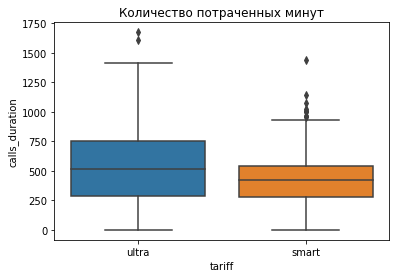

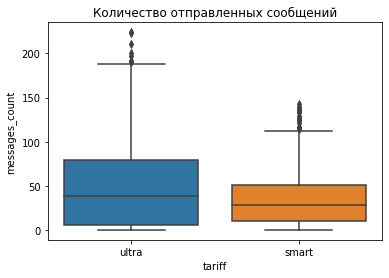

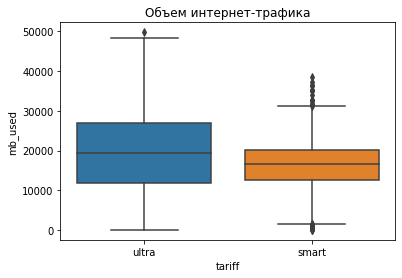

In [51]:
# построим диаграммы размахов параметров, перебирая ключи словаря dict_expenses.keys()
for column in  dict_expenses.keys():
    sns.boxplot(x='tariff', y=column, data = expenses_user_tariff)
    plt.title(dict_expenses[column])
    plt.show()

Для дальнейшего анализа избавимся от некотрых выбросов:

Количество потраченных минут:
- "ultra" - больше 1400; 
- "smart" - больше 1000

Количество отправленных сообщений:
- "ultra" - больше 190; 
- "smart" - больше 120

Объем интернет-трафика:
- "ultra" - больше 49000; 
- "smart" - больше 32000


In [52]:
expenses_user_smart = (
    expenses_user_tariff
    .query("tariff == 'smart' and calls_duration < 1000 and messages_count < 120 and mb_used < 32000")         
)

In [53]:
expenses_user_ultra = (
    expenses_user_tariff
    .query("tariff == 'ultra' and calls_duration < 1400 and messages_count < 190 and mb_used < 49000")       
)

In [54]:
# выведем общее количество месяцев пользователй, использующих тариф "Смарт"
expenses_user_smart['month'].count()

2202

Количество рассматриваемых месяцев пользователей "Смарт" сократилось  на 1.2%

In [55]:
# выведем общее количество месяцев пользователй, использующих тариф "Ультра"
expenses_user_ultra['month'].count()

972

Количество рассматриваемых месяцев пользователей "Ультра" сократилось на 1.3%

Проверим, как удаление выбросов повлияло на соотношение выручки по тарифам:

In [56]:
# найдем выручку по тарифу 'smatr' до удаления
expenses_user_tariff.query("tariff == 'smart'")['payment'].sum()

2749149.0

In [57]:
# найдем выручку по тарифу 'smatr' после удаления
expenses_user_smart['payment'].sum()

2650188.0

In [58]:
# найдем выручку по тарифу 'ultra' до удаления
expenses_user_tariff.query("tariff == 'ultra'")['payment'].sum()

2029622.0

In [59]:
# найдем выручку по тарифу 'ultra' после удаления
expenses_user_ultra['payment'].sum()

1998245.0

Выручка по тарифу "Смарт" уменьшилась примерно на 100 тыс., а по тарифу "Ультра" примерно на 30 тыс. По тарифу "Смарт" уменьшение произошло за счет слишком нетипичного поведения пользователей в рамках тарифа (использование объема трафика, превышающего даже лимит тарифа "Ультра"). Таким пользователям следует рекомендовать тариф "Ультра". Выбросы по тарифу "Ультра" не такие критичные, их можно было оставить.

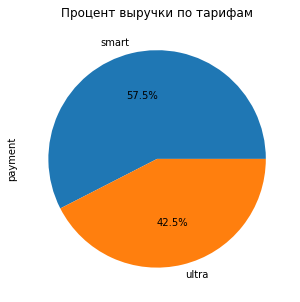

In [60]:
# построим круговую диаграмму, иллюстрирующую процент выручки по тарифу от общей выручки
expenses_user_tariff.groupby('tariff')['payment'].sum().plot( kind = 'pie',  
                                                             autopct = '%1.1f%%', figsize=(7,5))
plt.title('Процент выручки по тарифам')
plt.show()

### Cреднее количество, дисперсия и стандартное отклонение параметров по каждому тарифу. 

Для расчета среднего количества, дисперсии и стандартного отклонения параметров 'calls_duration', 'messages_count', 'mb_used' по каждому тарифу без выбросов создадим таблицы:
- stat_smart
- stat_ultra

In [61]:
# зададим колонки и строки таблиц
stat_columns = ['stat', 'calls_duration', 'messages_count', 'mb_used']
stat_data = [
    ['mean', 0, 0, 0],
    ['var', 0, 0, 0],
    ['std', 0, 0, 0]
]
# создадим таблицу 'stat_smart'
stat_smart = pd.DataFrame(data = stat_data, columns = stat_columns)
stat_smart

,stat,calls_duration,messages_count,mb_used
0,mean,0,0,0
1,var,0,0,0
2,std,0,0,0


In [62]:
# зададим колонку 'stat' в виде индексов таблицы
stat_smart.set_index(keys = 'stat',inplace=True)
stat_smart

,calls_duration,messages_count,mb_used
stat,,,
mean,0,0,0
var,0,0,0
std,0,0,0


In [63]:
# создадим такую же заготовку для таблицы 'stat_ultra'
stat_ultra = stat_smart

Рассчитаем среднее количество, дисперсию и стандартное отклонение по тарифу **smart** и занесем все данные в таблицу **stat_smart**

In [64]:
for column in  dict_expenses.keys():
    stat_smart.loc['mean', column] = expenses_user_smart[column].mean().round(0)
    stat_smart.loc['var', column] = expenses_user_smart[column].var(ddof=1).round(0)
    stat_smart.loc['std', column] = expenses_user_smart[column].std(ddof=1).round(0)
stat_smart

,calls_duration,messages_count,mb_used
stat,,,
mean,414.0,33.0,16102.0
var,34505.0,750.0,32914208.0
std,186.0,27.0,5737.0


Рассчитаем среднее количество, дисперсию и стандартное отклонение по тарифу **ultra** и занесем все данные в таблицу **stat_ultra**

In [65]:
for column in  dict_expenses.keys():
    stat_ultra.loc['mean', column] = expenses_user_ultra[column].mean().round(0)
    stat_ultra.loc['var', column] = expenses_user_ultra[column].var(ddof=1).round(0)
    stat_ultra.loc['std', column] = expenses_user_ultra[column].std(ddof=1).round(0)
stat_ultra

,calls_duration,messages_count,mb_used
stat,,,
mean,523.0,48.0,19409.0
var,96276.0,2098.0,100347918.0
std,310.0,46.0,10017.0


### Гистограммы плотностей анализируемых параметров по тарифам

Построим гистограммы плотности распределения, используя уже созданный словарь затрат по тарифам **dict_expenses** 

In [66]:
dict_expenses

{'calls_duration': 'Количество потраченных минут',
 'messages_count': 'Количество отправленных сообщений',
 'mb_used': 'Объем интернет-трафика'}

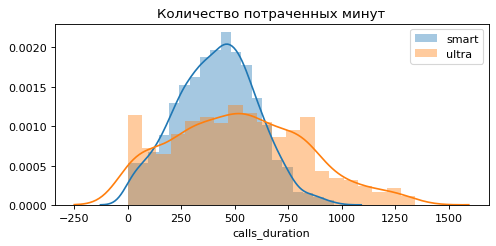

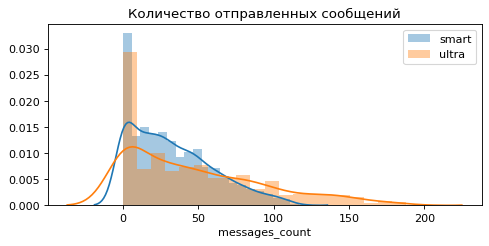

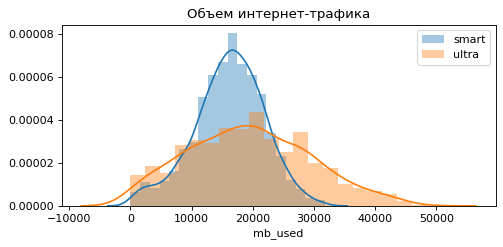

In [67]:
for column in  dict_expenses.keys():
    
    plt.figure(figsize=(7,3), dpi=80)
    sns.distplot(expenses_user_smart[column], bins = 20, label='smart')
   
    sns.distplot(expenses_user_ultra[column], bins = 20, label='ultra')
    plt.legend()
    plt.title(dict_expenses[column])
    
    plt.show()

1. Гистограмма плотностей "Количество потраченных минут"
   - тариф "Смарт"  - распределение нормальное с небольшой скошенностью влево, (среднее значение - 414). Вероятность превышения лимита минут звонков довольно высока. 
   - тариф "Ультра"  - можно было бы считать нормальным со скошенностью вправо, если бы не выбросы (среднее значение - 523), выборка по объему меньше, чем выборка пользователей "Смарт", поэтому график более растянут относительно оси х. Пользователи не превышают лимит по звонкам.
   
   
2. Гистограмма плотностей "Количество отправленных сообщений"
   - тариф "Смарт" -  имеет вид распределения Пуассона, довольно много пользователей превышает включенный лимит, но также очень многие не нуждаются в сообщениях
   - тариф "Ультра" - близко к распределению Пуассона, также как и в тарифе "Смарт" очень высока вероятноть пользователей, не использующих традиционные сообщения. Никто из пользователей не превышает лимит по сообщениям
   
   
3. Гистограмма плотностей "Объем интернет-трафика"
   - тариф "Смарт" - распределение нормальное с небольшой скошенностью влево, среднее значение - 16102 превышает включенный лимит трафика, но не намного
   - тариф "Ультра" - нормальное распределение с небольшой скошенностью вправо
   

### Вывод.

Пользователи в 2 раза чаще предпочитают тариф "Смарт", довольна высока вероятность превышения всех лимитов пользователями тарифа. 

Тариф "Ультра" выбирают преимущественно из-за большого объема интернет-трафика, чтобы пользоваться им и не думать. Некоторые пользователи либо вообще "не считают" потраченный трафик, либо им реально не хватает большого включенного объема.

## 4. Проверка гипотез

Проверим гипотезу:

- **"средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"**

У нас есть две выборки с рассчитанной выручкой пользователей 
- тарифа "Смарт" в таблице expenses_user_smart['payment']
- тарифа "Ультра" в таблице expenses_user_ultra['payment']

Сформулируем нулевую гипотезу:
Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

Альтернативная гипотеза:
Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.

Для иллюстрации альтернативной гипотезы выведем средние значения выручки пользователей по тарифам:

**"Смарт"**

In [68]:
expenses_user_smart['payment'].mean().round(0)

1204.0

**"Ультра"**

In [69]:
expenses_user_ultra['payment'].mean().round(0)

2056.0

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуемся методом 

**scipy.stats.ttest_ind**

In [70]:
# зададим уровень значимости
alpha = 0.05 

results = st.ttest_ind(
    expenses_user_smart['payment'],
    expenses_user_ultra['payment'],
)

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.489257822105756e-226
Отвергаем нулевую гипотезу


По имеющимся выборкам мы получили ничтожно малую вероятность, того что средние выручки пользователей двух тарифов могут быть равны. Следовательно у нас нет оснований принять нулевую гипотезу. Поэтому считаем, что гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт» подтверждается. 

Проверим другую гипотезу:

- **средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов**.

Сформулируем нулевую гипотезу: Средняя выручка пользователей из Москвы и других регионов равна.

Альтернативная гипотеза: Средняя выручка пользователей из Москвы и других регионов не равна.

Для иллюстрации альтернативной гипотезы выведем средние значения выборки платежей пользователей по Москве и другим регионам:

In [71]:
expenses_user_tariff.loc[expenses_user_tariff['city']=='Москва', 'payment'].mean().round()

1507.0

In [72]:
expenses_user_tariff.loc[expenses_user_tariff['city']!='Москва', 'payment'].mean().round()

1482.0

Мы получили, что средние выборок платежей Москвы и других регионов отличаются, но незначительно.

Проверим значение вероятности pvalue:

In [73]:
alpha = 0.05 

results = st.ttest_ind(
    expenses_user_tariff.loc[expenses_user_tariff['city']=='Москва', 'payment'],
    expenses_user_tariff.loc[expenses_user_tariff['city']!='москва', 'payment'])

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.551526945605073
Не получилось отвергнуть нулевую гипотезу


Итак, мы получили довольно высокий уровень p-value, равный приблизительно 55%, который говорит о том, что вероятность получения подобных данных высокая, при условии верности нулевой гипотезы, поэтому мы ее не отвергаем, так как данные не противоречат ей. В связи с этим мы не может утверждать, что средняя выручка пользователей из Москвы существенно отличается отличается от средней выручки пользователей из других регионов. 

## 5. Вывод

Выполнен анализ анализ клиентов по тарифам "Смарт" и "Ультра" на небольшой выбоке клиентов за 2018 год по месяцам. Изучены представленные данные, удалены нулевые значения по минутам звонков, заменены типы данных, связанных с датой.

Рассчитаны параметры по пользователям по месяцам:
- количество израсходованных минут;
- количество отправленных сообщений;
- объем интернет-трафика;
- выручка каждого тарифа.

Выполнено описание поведения клиентов тарифов "Смарт" и Ультра". Проведен анализ данных, посчитаны среднее количество, дисперсия и стандартное отклонение параметров выборки по тарифам "Смарт" и "Ультра": 
- количество израсходованных минут;
- количество отправленных сообщений;
- объем интернет-трафика.

Построены и описаны гистограммы плотностей распределения.

Проверены 2 гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

1-я гипотеза подтвердилась, 2-я нет

Исходя из количественного предпочтения пользователями тарифа "Смарт" и потенциала пользователей этого тарифа превышать все установленные лимиты, рекламную компанию следует акцентировать на тарифе "Смарт", а рекламу тарифа "Ультра" делать узконаправленнную, ориентированную  на "пожирателей" интернет-трафика.